# Neuron class

In [106]:
import math

class Neuron:
    weights = []

    def __init__(self):
        pass
    
    def param_sum(self, x, bias, w):
        return sum(w[i]*x[i] for i in range(len(x))) + bias

    def threshold_function(self, x, bias, w = weights):
        return (int)(self.param_sum(x, bias, w) > 0)

    def sigmoid_function(self, x, bias, w = weights):
        return (1/(1+math.exp(-1*self.param_sum(x, bias, w))) > 0.5)


# Setup
## Static data

In [107]:
class Dataset:
    x = [(0.2, 0.5), (0.2, -0.7), (0.8, -0.8), (0.8, 1)]
    f = [0, 0, 1, 1]
    bStatic = -4.5

    def __init__(self):
        pass


## Random
### generator
Random number pair generator for weight generatio. Need to use seed, to quickly generate new randoms, as the basic random method returns the same values

In [118]:
import random
from pandas import Timestamp

randi = 0
def new_rand():
    global randi
    randi += 1
    seed2 = Timestamp.now().microsecond / random.randint(1, 1000)
    random.seed(randi + seed2)
    return [random.random() *40 -20 for _ in range(2)]

## Check random weights, if they work with current dataset

In [109]:
def check_weights(dataset, weights, function):
    verdict = True
    for i in range(dataset.x.__len__()):
        if function(dataset.x[i], dataset.bStatic, weights) != dataset.f[i]:
            verdict = False
            break
    return verdict

# Start section

ToggleButtons(description='Choose activation function:', options=('Sigmoid', 'Threshold'), value='Sigmoid')

Button(description='Run', style=ButtonStyle())

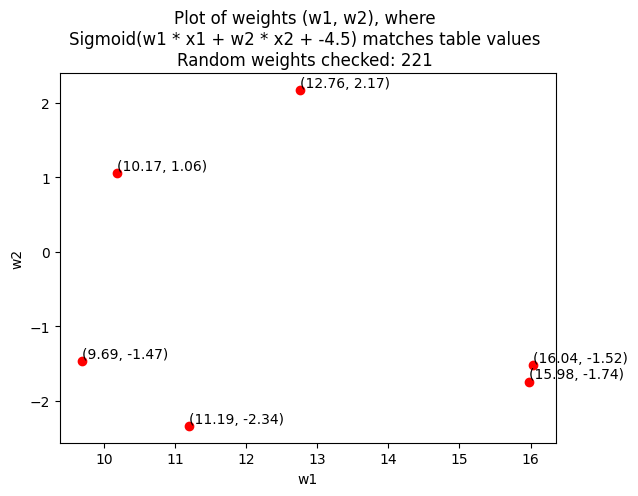

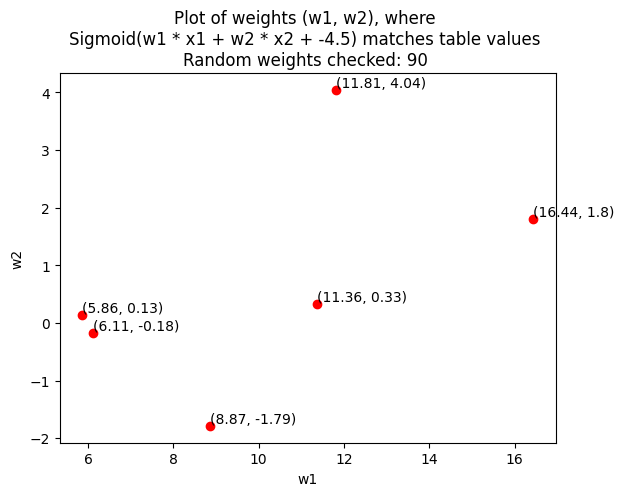

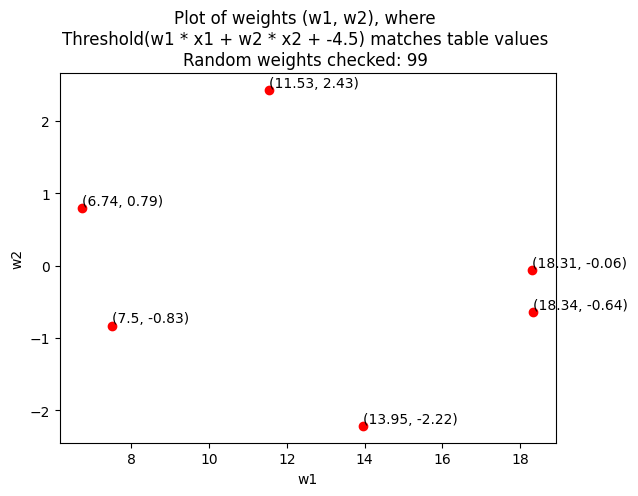

In [121]:
import ipywidgets as widgets
import matplotlib.pyplot as plt


# create a neuron object
neuron = Neuron()
# dataset of x values and expected activation function f values
dataset = Dataset()

# Create a dictionary that maps function names to functions
functions = { "Sigmoid": neuron.sigmoid_function, "Threshold": neuron.threshold_function}

# Create a ToggleButtons widget
toggle = widgets.ToggleButtons(
    # Use function names as options
    options=functions.keys(),  
    description='Choose activation function:',
)
# Display the widget
display(toggle)

# Create a button that will run the selected function when clicked
button = widgets.Button(description="Run")


def on_run_clicked(b):
    b.description = "Running..."
    res = []
    global randi
    randi = 0

    # this is the main random weight search loop
    # it generates a random weight, checks if it is valid and if so, adds it to the list
    # it does this until it has found 5 valid weights or tried 20000 times (whichever comes first)
    while (randi < 2000) and (len(res) <= 5):
        random_weights = new_rand()
        if(check_weights(dataset, random_weights, functions[toggle.value])):      
            res.append(random_weights)
    
    b.description = "Run"

    # If no valid weights were found, print an error message
    if res.__len__() == 0:
        print(f'No valid weights found after {randi} attempts')
        return
    
    # Unpack the pairs into two lists
    x_values, y_values = zip(*res)

    # Create a scatter plot
    plt.plot(x_values, y_values, 'ro')
    plt.title(f'Plot of weights (w1, w2), where \n{toggle.value}(w1 * x1 + w2 * x2 + {dataset.bStatic}) matches table values \nRandom weights checked: {randi} ')

    plt.xlabel('w1')
    plt.ylabel('w2')

    # Add labels for each point with 2 decimal numbers
    for i in range(len(res)):
        plt.text(res[i][0], res[i][1], f'({round(res[i][0], 2)}, {round(res[i][1], 2)})', ha='left', va='bottom')

# Register the callback function with the button
button.on_click(on_run_clicked)
display(button)
# Run the function to display the output
# debugging only
button.click()

plots for sanity check

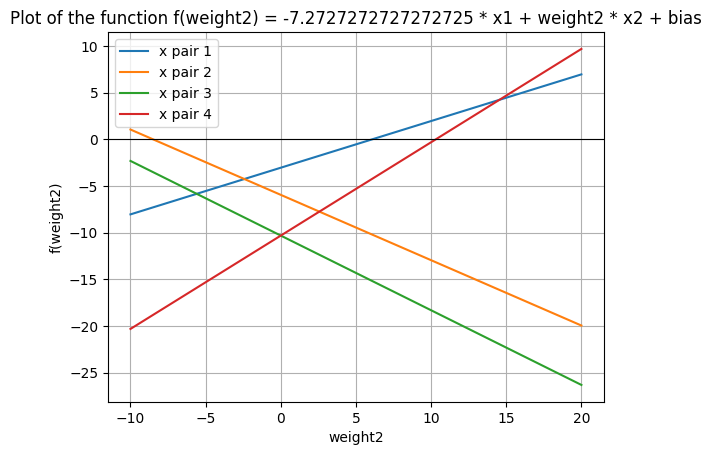

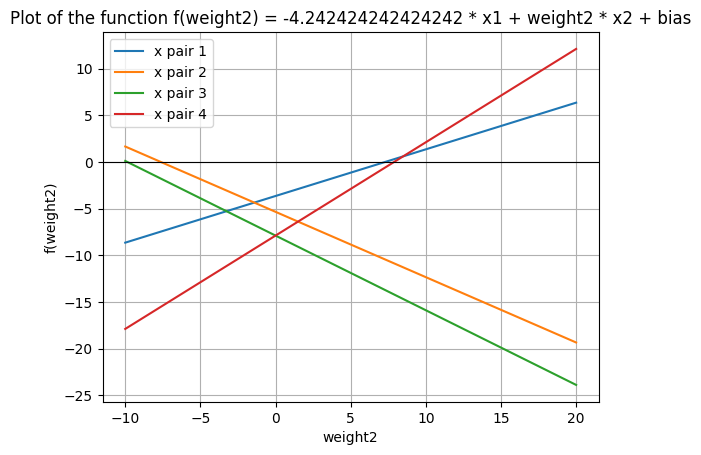

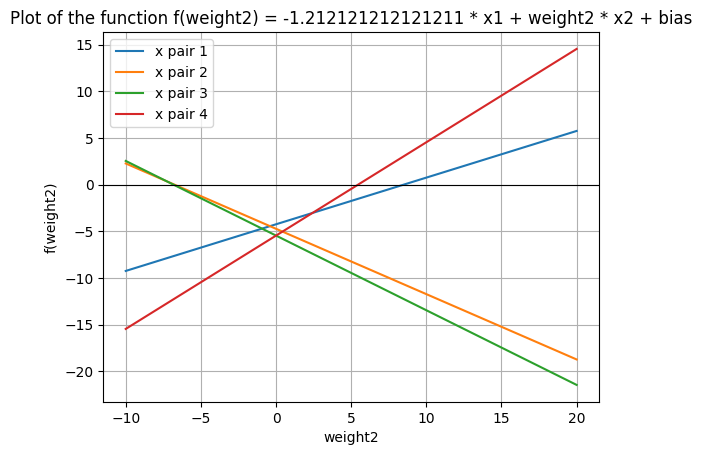

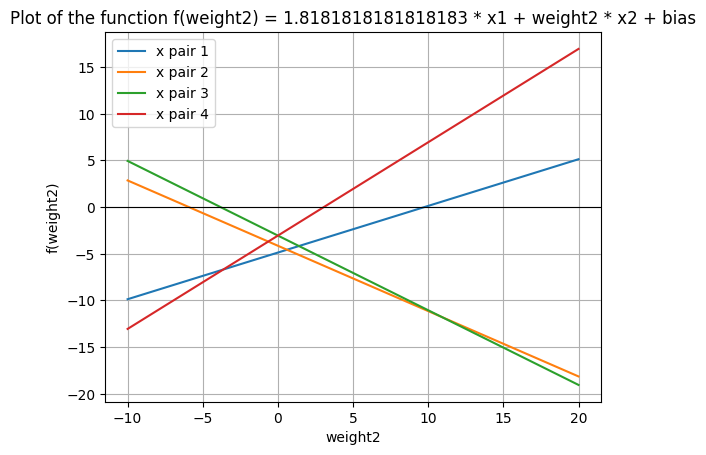

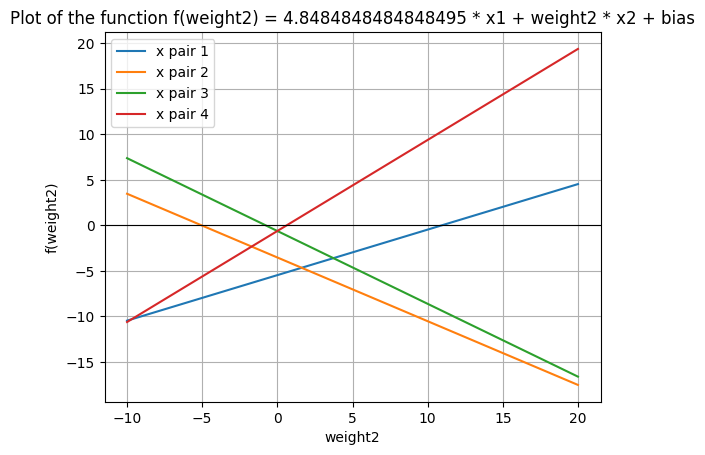

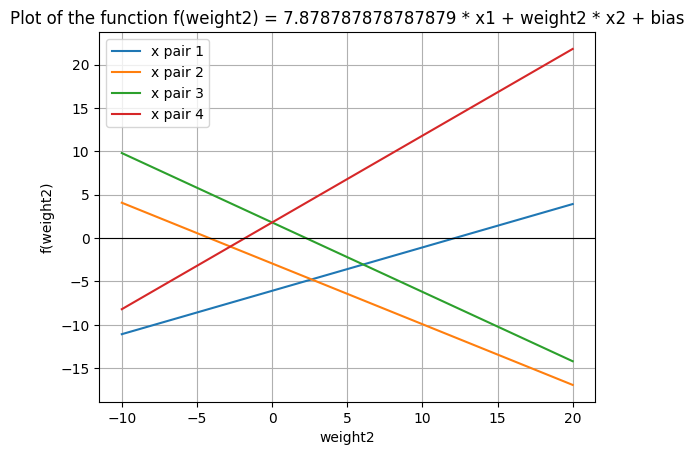

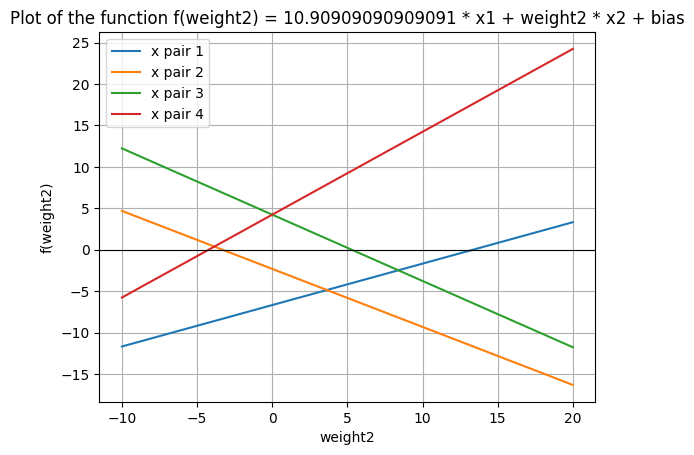

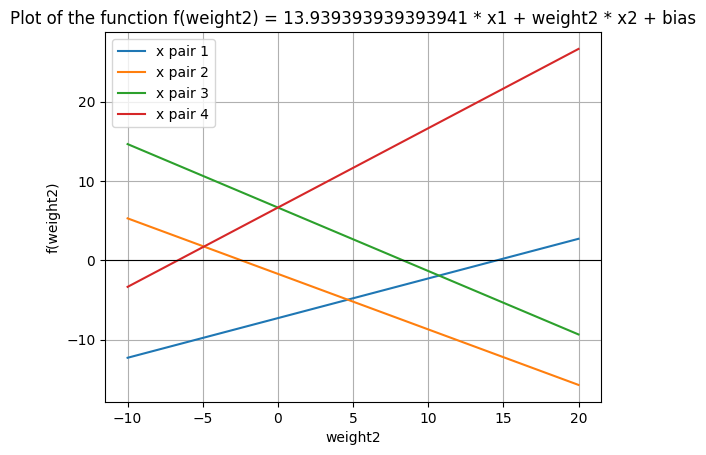

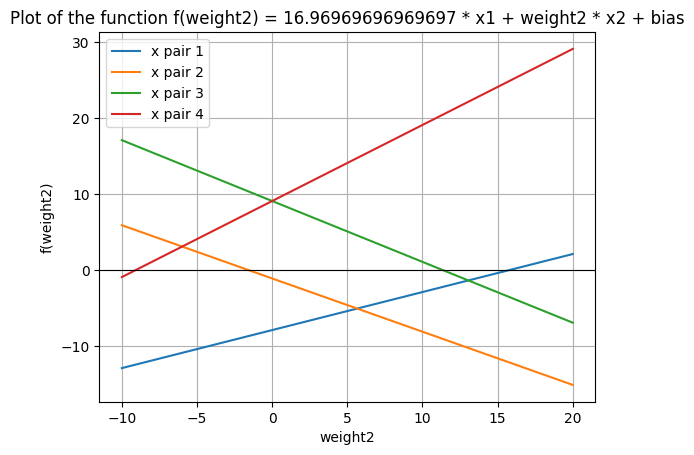

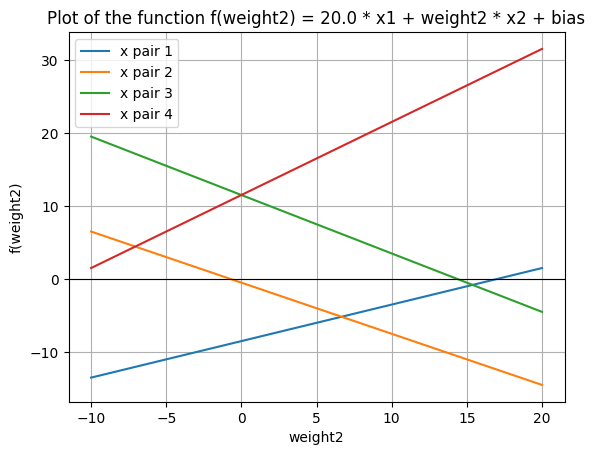

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Static values
bias = -4.5

# Set of x pairs
x_pairs = [(-0.2, 0.5), (0.2, -0.7), (0.8, -0.8), (0.8, 1)]

# Generate a range of values for weight1
weight1_values = np.linspace(-10, 20, 100)
# Generate a range of values for weight2
weight2_values = np.linspace(-10, 20, 100)

# Initialize i to keep track of the number of plots
p=0

for weight1 in weight1_values:
    # tracks i to know when to show the plot
    p+=1
    # Clear the plot
    plt.clf()
    # Plot the function for each x pair
    for i, (x1, x2) in enumerate(x_pairs):
        # Calculate the corresponding f(weight2) values
        f_values = weight1 * x1 + weight2_values * x2 + bias

        # Plot the function
        plt.plot(weight2_values, f_values, label=f'x pair {i+1}')
    
    plt.axhline(0, color='black', linewidth=0.8)
    plt.xlabel('weight2')
    plt.ylabel('f(weight2)')
    plt.title(f'Plot of the function f(weight2) = {weight1} * x1 + weight2 * x2 + bias')
    plt.legend()
    plt.grid(True)
    if p % 10 == 0:
        plt.show()
